# Methods
## CBIS-DDSM Dataset
The Curated Breast Imaging Subset (CBIS) of the Digital Database for Screening Mammography (DDSM) dataset, otherwise known as the CBIS-DDSM dataset is an updated and standardized version of the 1997 DDSM database of 2,620 scanned film mammography studies. CBIS-DDSM contains normal, benign, 892 mass cases and 753 calcification cases, with verified pathology information, resulting in a total of 3568 digitized screen-film mammograms (DFM). 

### Standard DICOM Format
It has been converted from lossless joint photographic experts group (JPEG) format, into 16-bit gray scale Tag Image File Format (TIFF) files, which were later converted to the Digital Imaging and Communications in Medicine (DICOM) format, the standard for medical imaging. Updated ROI segmentation and bounding boxes, and pathologic diagnosis for training data are also included. 

### Digital Images
All mammography are distributed as DICOM files and include both craniocaudal (CC) and mediolateral oblique (MLO) views of the mammograms. The region of interest (ROI) for each abnormality is represented as binary mask image of the same size as the mammogram.

### Annotations
Each case has been annotated with Breast Imaging Reporting and Data System (BI-RADS) descriptors for mass shape, mass margin, calcification type, and calcification distribution. Breast density was rated in accordance with the BI-RADS breast density classification ands scoring scheme, difficulty or the level of subtlety of the abnormality was rated, and the abnormality was assigned an overall assessment based upon BI-RADS seven point categorization scale.

### Data Split: Training and Test Sets
CBIS-DDSM data were split into training (80%) and test (20%) sets by BI RADS assessment score; calcification and mass cases were sampled separately to ensure that both training and test sets had cases of varying difficulty, subtlety, and pathology.  

It's collection statistics are as follows:

| Modalities         |  MG   |
|--------------------|-------|
| Number of Patients | 6671  |
| Number of Studies  | 6775  |
| Number of Series   | 6775  |
| Number of Images   | 10239 |
| Image Size (GB)    | 163.6 |



In [1]:
import warnings
from IPython.display import HTML, display_html
from bcd.services.visual.config import VisualConfig
from bcd.data.analysis.metadata import MassMeta, CalcMeta
from bcd.data import RAW_METADATA_FILEPATH
warnings.filterwarnings("ignore")

### Metadata
CBIS-DDSM series metadata are included in accompanying CSV files, which describes the training and test data for the calcification and mass cases.   The individual files containing the metadata for calcification and mass training and test sets are:

| # | Dataset                    | Filename                            |
|---|----------------------------|-------------------------------------|
| 1 | Mass Training Set          | mass_case_description_train_set.csv |
| 2 | Mass Test Set              | mass_case_description_test_set.csv  |
| 3 | Calcification Training Set | calc_case_description_train_set.csv |
| 4 | Calcification Test Set     | calc_case_description_test_set.csv  |

The following outlines the metadata maintained for each abnormality:   

| #  | Variable                   | Description                                                                                                     |
|----|----------------------------|-----------------------------------------------------------------------------------------------------------------|
| 1  | Patient ID                 | The first 7 characters of the image filenames in the case file.                                                 |
| 2  | Breast Density             | Density of the breast tissue according to BI-RADS Breast Density   Classification                               |
| 3  | Breast                     | Indicates which side, left or right, the image presents.                                                        |
| 4  | View                       | Indicates the projection in the screening mammography; either   craniocaudal (CC) or mediolateral oblique (MLO) |
| 5  | Abnormality Number         | The number of the adnormality for the image, since some cases have   multiple abnormalities.                    |
| 6  | Abnormality Type           | Either mass or calcification                                                                                    |
| 7  | Mass Shape                 | For mass dataset                                                                                                |
| 8  | Mass Margin                | For mass dataset                                                                                                |
| 9  | Calcification Type         | For calcification dataset                                                                                       |
| 10 | Calcification Distribution | For calcification dataset                                                                                       |
| 11 | BI-RADS Assessment         | Overall assessment of the abnormality    according to BI-RADS classification scheme.                            |
| 12 | Pathology                  | Benign, Benign without Callback, or Malignant                                                                   |
| 13 | Subtlelty Rating           | Radiologists' rating of difficulty in viewing the abnormality in the image                                      |
| 14 | Image Filepaths            | Filepaths to the image, the cropped image, and the ROI image.                                                   |

The next section is an examination of the metadata for the calcification and mass case metadata. 


### Cases and Abnormalities
A case, in this context, is used to indicate a particular abnormality, seen on the craniocaudal (CC) and/or the mediolateral oblique (MLO) views.  The number of cases and abnormalities for the calcification and mass cases is depicted here.

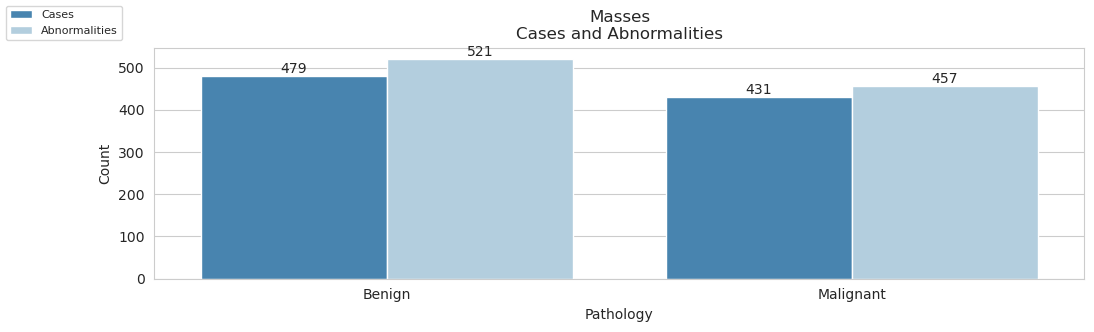

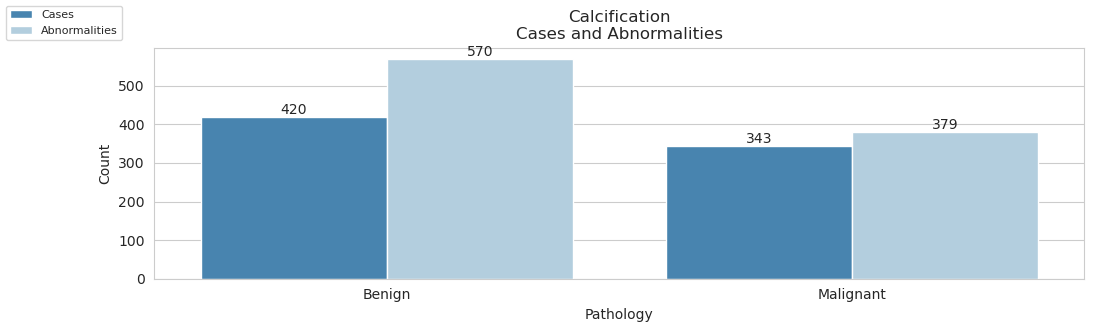

In [2]:
mass = MassMeta(train_filepath=RAW_METADATA_FILEPATH['mass_train'], test_filepath=RAW_METADATA_FILEPATH['mass_test'])
calc = CalcMeta(train_filepath=RAW_METADATA_FILEPATH['calc_train'], test_filepath=RAW_METADATA_FILEPATH['calc_test'])
mass.overview()
calc.overview()

Some 990 benign, and 722 malignant calcification abnormalities combined with 1000 benign, and 888 malignant mass cases and metadata have been split into training and test sets for CAD analysis and research. To ensure that both test and training sets had cases of equal difficulty, the data were split along BI-RADS assessment categories as follows: 

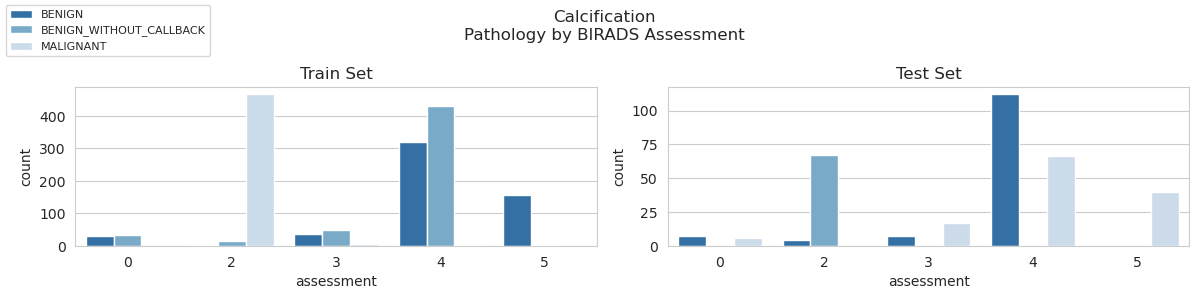

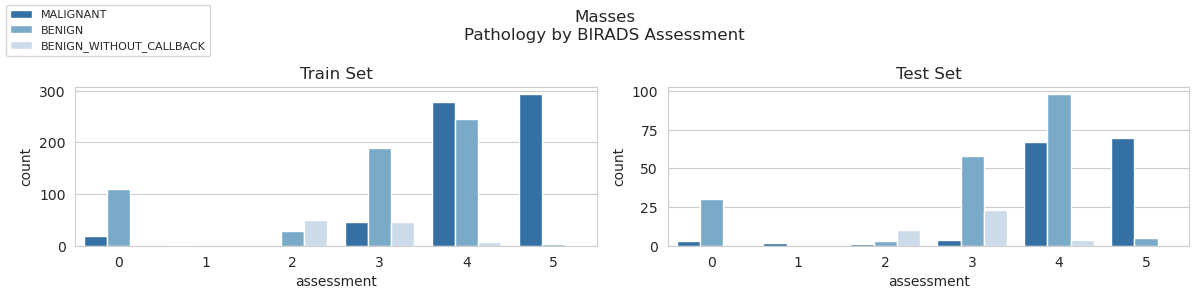

In [3]:
calc.pathology_assessment()
mass.pathology_assessment()

BI-RADS provides standardized breast imaging terminology, report organization, assessment structure and a classification system for mammography, ultrasound and MRI of the breast. BI-RADS reporting enables radiologists to communicate results to the referring physician clearly and consistently, with a final assessment and specific management recommendations. 

Test results from mammograms, magnetic resonance imaging (MRI) and ultrasounds, are scored in BI-RADS (Breast Imaging Reporting and Data System) categories, which range from category 1 (not cancer) to category 6 (high likelihood of cancer). A category 0 means more tests are needed.  They are defined as follows:

| Category | Definition                                                                                               |
|----------|----------------------------------------------------------------------------------------------------------|
| 0        | Category 0 means the findings are unclear. The radiologist will need more   images to determine a score. |
| 1        | Category 1 means the findings are negative and the breast tissue appears   normal.                       |
| 2        | Category 2 means the findings are benign, which is also negative for   cancer.                           |
| 3        | Category 3 means the findings are probably benign.                                                       |
| 4        | Category 4 means the findings suspect cancer.                                                            |
| 5        | Category 5 means the findings highly suggest cancer.                                                     |
| 6        | Category 6 means cancer was previously diagnosed using a biopsy.                                         |

The cases in the CBIS-DDSM dataset have a rating between 0 and 5. Above, we have the distribution of ratings by type of case, and dataset. Several observations stand out. Starting with the calcification cases training set:
1. A significant number of calcification cases believed to be benign were malignant. 
2. A larger number of cases assessed to suspect cancer, were benign.
3. Nearly 150 cases in which cancer was highly suspected, were benign.
4. 
  A majority of the calcification cases suspect cancer. As indicated, the calcification dataset is 

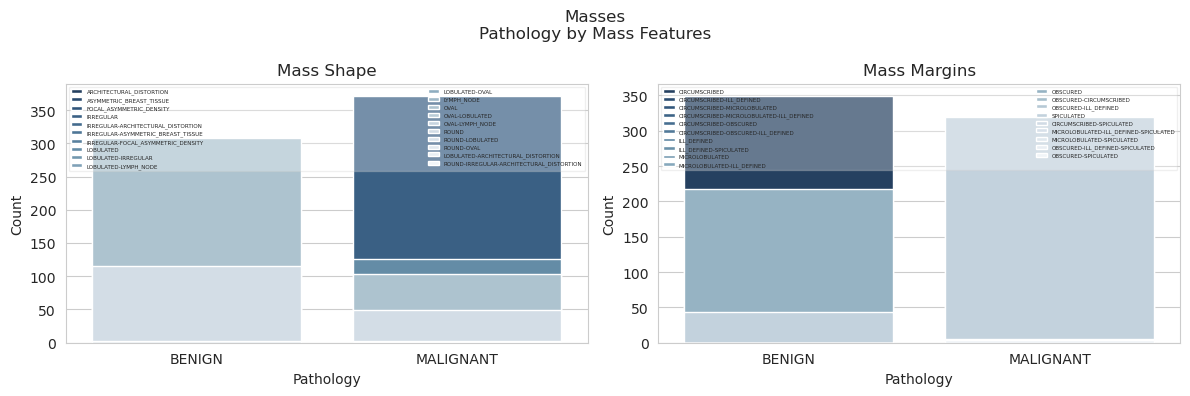

In [4]:
df1, df2 = mass.pathology_feature()

To what degree are the features of the abnormal mass, its shape and margins, indicators of cancer risk in this dataset. Malignant breat masses tend to be hard, nodular, irregular in shape, and fixed to an underlying or overlying tissues. Interestingly, irregular shape the most frequent feature among both the benign and malignant samples in this dataset, followed by architecture distortion, and asymmetry. For mass margins, the data are consistently inconclusive as circumscribed mass margins or the most frequent of both benign and malignant cases.  

In [5]:
df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Pathology\nMass Shape")
df2_style = df2.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Pathology\nMass Margins")
display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Pathology,Mass Shape,Count
8,MALIGNANT,IRREGULAR,371
5,MALIGNANT,ARCHITECTURAL_DISTORTION,61
9,MALIGNANT,IRREGULAR-ARCHITECTURAL_DISTORTION,49
6,MALIGNANT,ASYMMETRIC_BREAST_TISSUE,8
7,MALIGNANT,FOCAL_ASYMMETRIC_DENSITY,7
3,BENIGN,IRREGULAR,93
0,BENIGN,ARCHITECTURAL_DISTORTION,42
2,BENIGN,FOCAL_ASYMMETRIC_DENSITY,18
1,BENIGN,ASYMMETRIC_BREAST_TISSUE,17
4,BENIGN,IRREGULAR-ARCHITECTURAL_DISTORTION,3


### Pathology and Calcification Abnormalities
Breast calcifications, or calcium deposits, develop commonly in breast tissue and are usually a sign of a benign condition. 

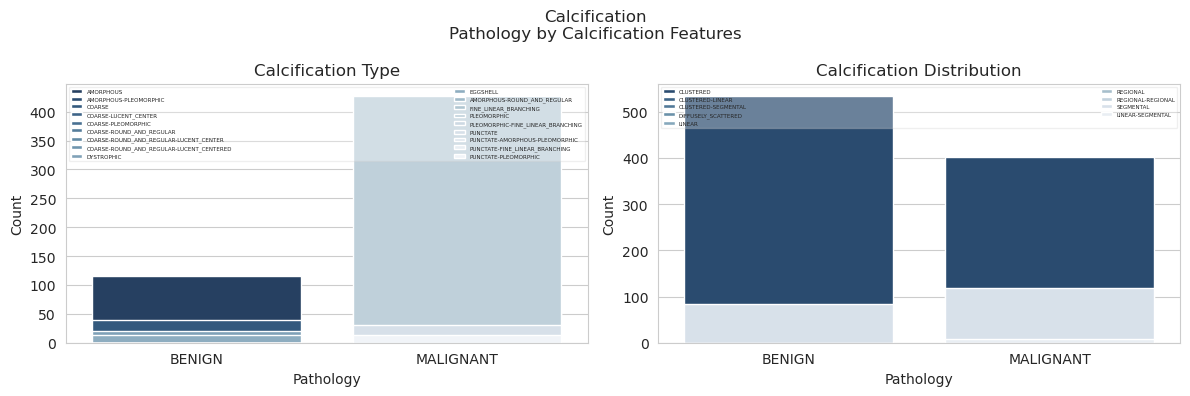

In [6]:
df1, df2 = calc.pathology_feature()


In [7]:
df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Calcification")
df2_style = df2.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Calcification")
display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Calcification Type,Count
Pathology,,
MALIGNANT,PLEOMORPHIC,427
MALIGNANT,FINE_LINEAR_BRANCHING,79
MALIGNANT,AMORPHOUS,65
MALIGNANT,AMORPHOUS-PLEOMORPHIC,10
MALIGNANT,AMORPHOUS-ROUND_AND_REGULAR,3
BENIGN,AMORPHOUS,116
BENIGN,COARSE,39
BENIGN,AMORPHOUS-PLEOMORPHIC,6
BENIGN,COARSE-LUCENT_CENTER,6


### Data Splits
The CBIS-DDSM data were then split into a training set (80%) and a test set (20%), stratified by the BI-RADS assessment category, The calcification cases and the mass cases were split separately to ensure that both sets had cases of varying difficulty. The figure below outlines the distribution of mass and calcification cases and abnormalities for each dataset by pathology for the training and test sets.

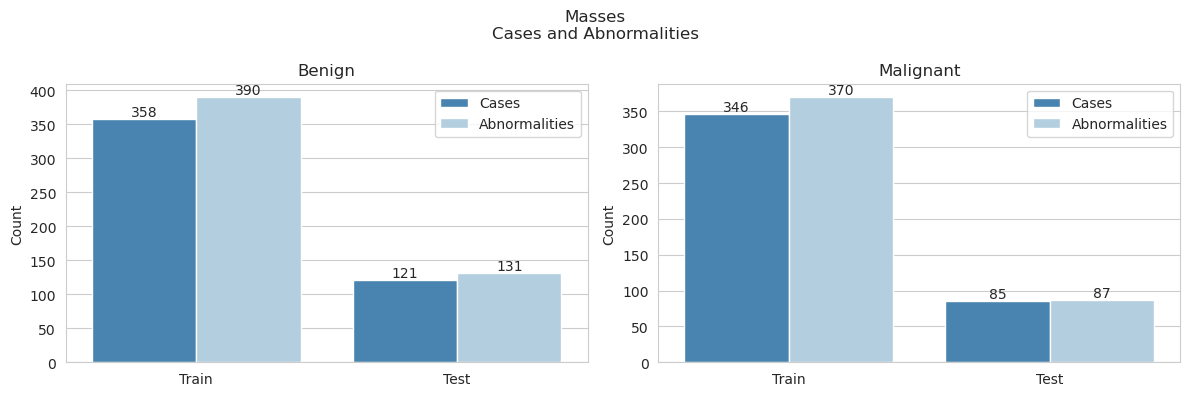

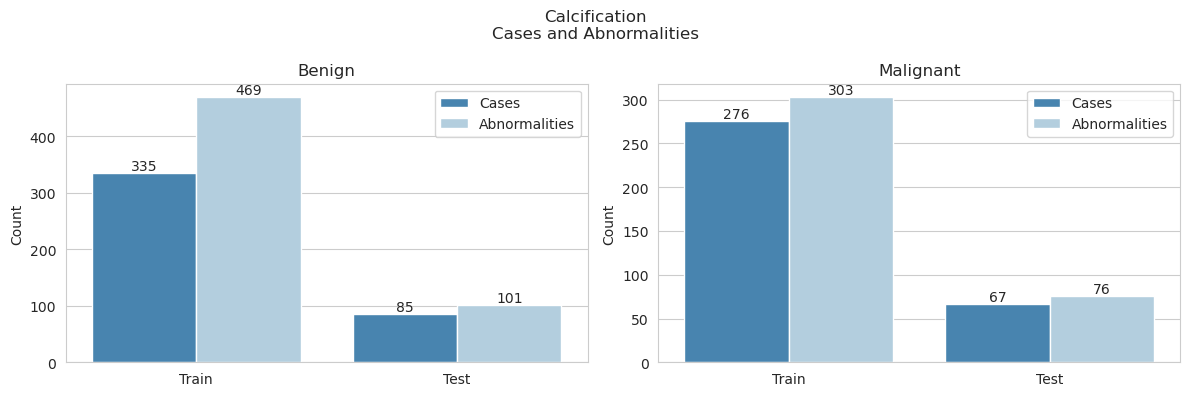

In [8]:
mass.summary()
calc.summary()



### CBIS-DDSM Metadata




### Pathology by Density
Women who have dense breast tissue have a greater risk of breast cancer, relative to women with less dense breast tissue. A second reason that breast tissue density is important, is that dense breast tissue can conceal breast masses and cancers, making it harder for radiologists to see the cancer on mammograms. The figure below exhibits the distribution of breast density cases vis-a-vis case pathology for the mass and calcification training and test sets.  

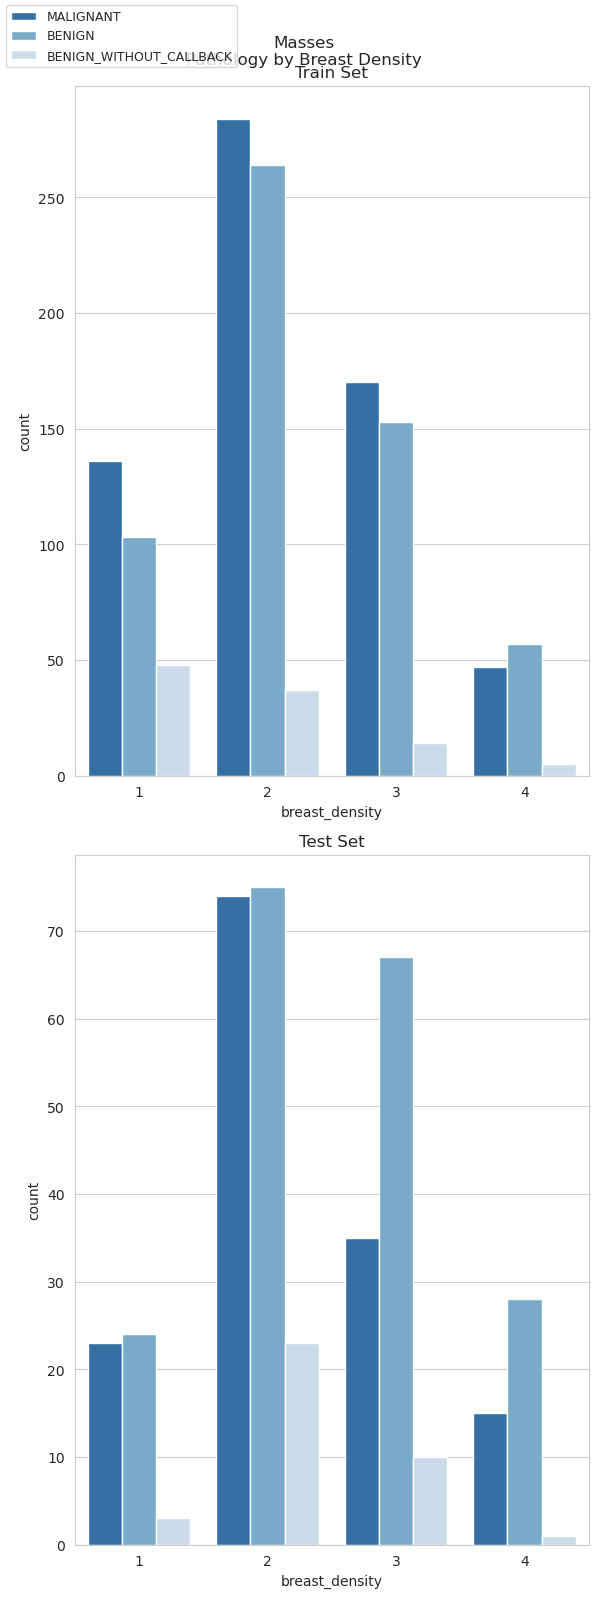

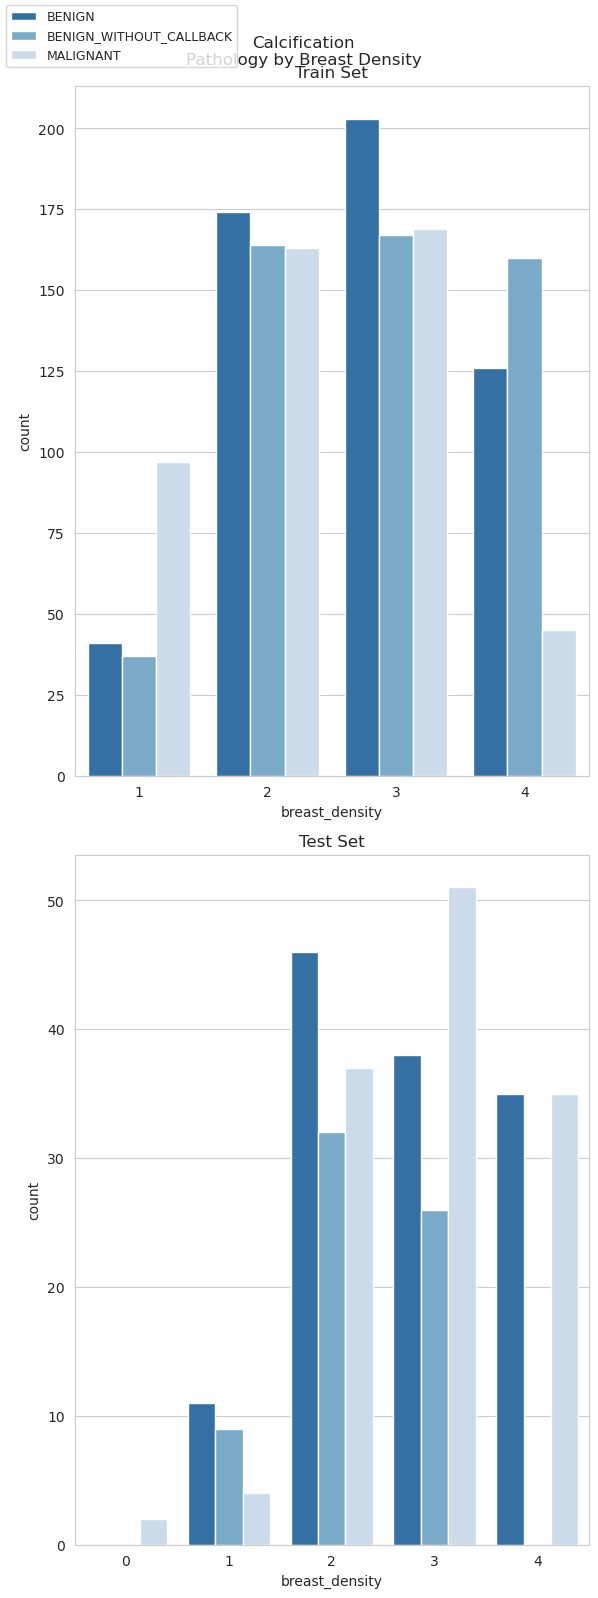

In [9]:
mass.pathology_density()
calc.pathology_density()